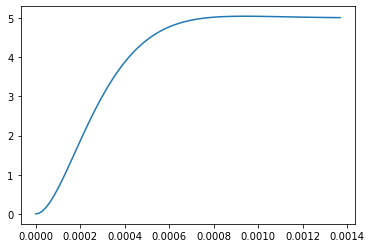

In [8]:
# averaged switch model

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 30, 0.00033, 0.0000033
Doff= 0.2

G = co.tf([1], [L * C / Doff, 1 / Doff * L / R, Doff])
t, y = co.step_response(G)

plt.plot(t, y)


3798215.306190736


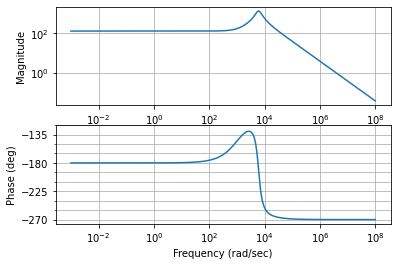

In [1]:
# 0db 주파수 구하기

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 100, 0.00033, 0.0000033
D = 0.8
Vin = 5
Vof = Vin / (1 - D)
ILf = Vof / 2

G = co.tf([-ILf * L, -(1 - D) * Vof], [L * C, L / R, (1 - D) ** 2])

mag, phase, omega = co.bode(G, omega=np.logspace(-3, 8, 1000))

M_margin_min = 1e15
w_0db = -1
for M, phi, w in zip(mag, phase, omega):
  if np.abs(M - 1) < M_margin_min:
    M_margin_min = abs(M - 1)
    w_0db = w

print(w_0db)


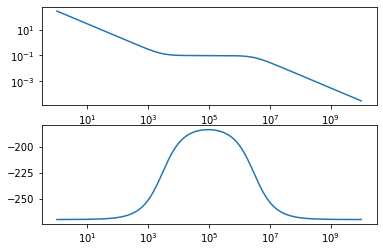

In [48]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R1, R2, R4, C1, C3 = 2100, 200, 400, 1700e-9, 1.7e-9

Gc = -co.tf([R2 * C1, 1], [R1 * C1 * C3 * R2, (C1 + C3) * R1, 0])

mag, phase, omega = co.bode(Gc, omega=np.logspace(0, 10, 1000), plot=False)

plt.subplot(2, 1, 1)
# plt.yticks(np.logspace(1, 5, 5))
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.plot(omega, mag)

plt.subplot(2, 1, 2)
# plt.yticks(np.arange(-270, -90, 180))
plt.xscale('log', base=10)
plt.plot(omega, phase * 180 / np.pi)


361041.85971733375 -97.16944512493113


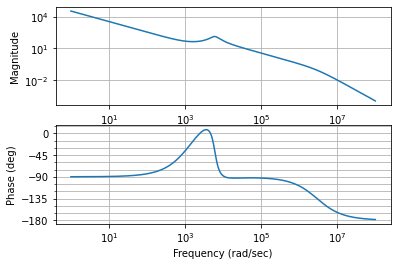

In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

GH = G * Gc

mag, phase, omega = co.bode(GH, omega=np.logspace(0, 8, 1000))

w_0db = 0
min_0db_margin = 1000000
phase_0db = 0
for M, phi, w in zip(mag, phase, omega):
  if np.abs(M - 1) < min_0db_margin:
    min_0db_margin = np.abs(M - 1)
    w_0db = w
    phase_0db = phi

print(w_0db, phase_0db * 180 / np.pi)